## Import the libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the datasets

In [4]:
X_train = pd.read_csv("/home/kanand_prime18/Banking_Marketing_X_train.csv")

In [5]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,29,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,thu,11,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,121,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,163,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,131,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [6]:
Y_train = pd.read_csv("/home/kanand_prime18/Banking_Marketing_Y__train.csv")
Y_train.head()

,no
0,no
1,no
2,no
3,no
4,no


In [7]:
X_test = pd.read_csv("/home/kanand_prime18/Banking_Marketing_X_test.csv")
X_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,53,unemployed,married,unknown,unknown,no,no,telephone,may,thu,202,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
1,51,technician,married,high.school,unknown,unknown,unknown,cellular,aug,wed,637,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1
2,36,admin.,married,university.degree,no,yes,yes,cellular,may,thu,1178,1,6,2,success,-1.8,93.876,-40.0,0.699,5008.7
3,32,admin.,single,university.degree,unknown,no,no,cellular,aug,tue,240,5,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
4,50,self-employed,married,basic.9y,no,yes,no,cellular,aug,thu,93,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


## Analysis the training dataset

In [8]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
1,29,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,thu,11,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,121,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,163,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,131,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [24]:
bank = pd.concat([X_train,Y_train] ,axis = 1)

In [25]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1,29,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,thu,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [81]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['no'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no
0,30,management,divorced,high.school,no,no,yes,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1,29,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,thu,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
2,31,blue-collar,divorced,basic.9y,no,yes,yes,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,41,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
4,35,blue-collar,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
y.shape

(32950, 1)

In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
age               32950 non-null int64
job               32950 non-null object
marital           32950 non-null object
education         32950 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null int64
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
no                32949 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [27]:
bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
no                 True
dtype: bool

In [28]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'no'],
      dtype='object')

## 1. Bank client data Analysis and categorical Treatment 

* Work with the atributes related to bank clients
* To make things more clear, i'm going to creat a new datasets that contains just this part of data

In [29]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,30,management,divorced,high.school,no,no,yes
1,29,blue-collar,married,basic.9y,unknown,yes,yes
2,31,blue-collar,divorced,basic.9y,no,yes,yes
3,41,blue-collar,married,basic.4y,no,no,no
4,35,blue-collar,married,basic.4y,no,no,no


### 1.1 Knowing the categorical variable

In [30]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['management' 'blue-collar' 'services' 'admin.' 'self-employed'
 'technician' 'entrepreneur' 'retired' 'student' 'unemployed' 'unknown'
 'housemaid']


In [32]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['divorced' 'married' 'single' 'unknown']


In [33]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['high.school' 'basic.9y' 'basic.4y' 'university.degree'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']


In [34]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['yes' 'no' 'unknown']


### 1.2 Age

* Trying to get some insights crossing those varaibles

In [35]:
print('Min Age: ', bank_client['age'].max())
print('Max Age:', bank_client['age'].min())
print('Null Values:', bank_client['age'].isnull().any())

Min Age:  98
Max Age: 17
Null Values: False


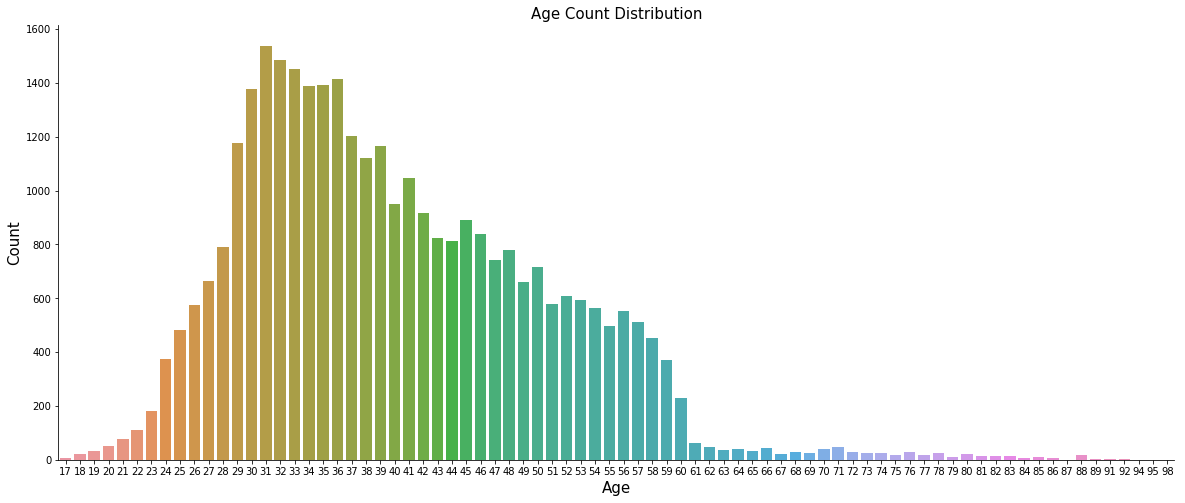

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
sns.despine()

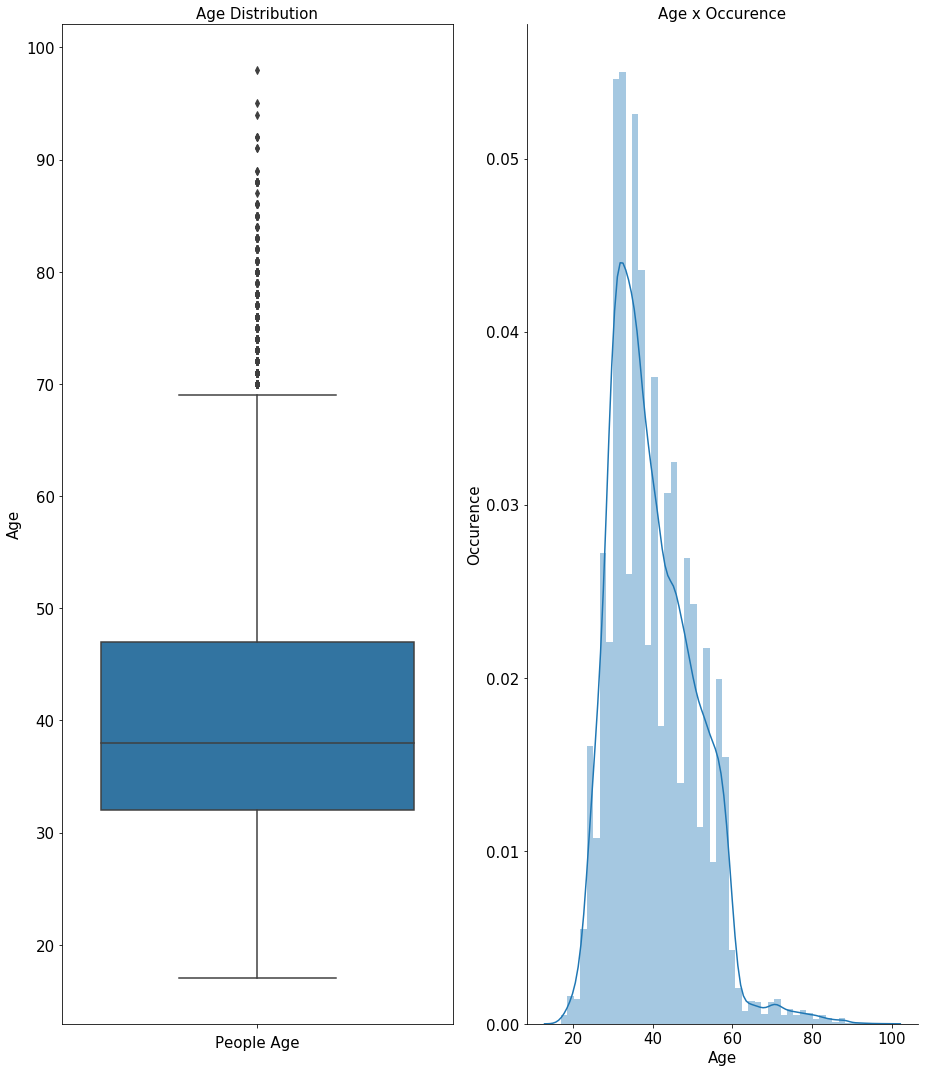

In [37]:
fig, (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2,figsize = (13,15))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [39]:
#Quartiles
print('1º Quartile: ', bank_client['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_client['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_client['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_client['age'].quantile(q = 1.00))

#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 
                      1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [40]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  389
Number of clients:  32950
Outliers are: 1.18 %


In [41]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscribe a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

### 1.3 JOBS

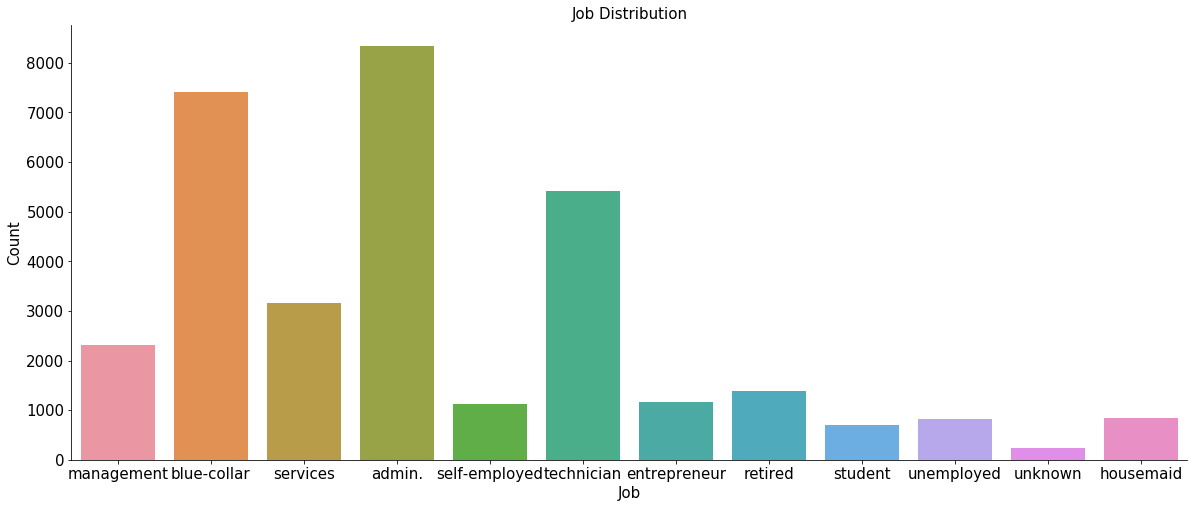

In [43]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation\

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Job Distribution', fontsize = 15)
ax.tick_params(labelsize=15)
sns.despine()

### 1.4 Marital

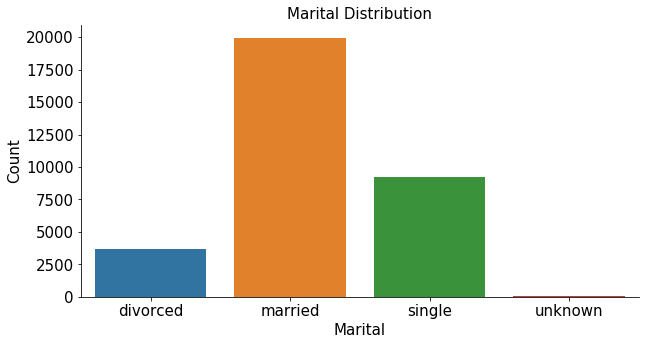

In [45]:
# What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### 1.5 Education

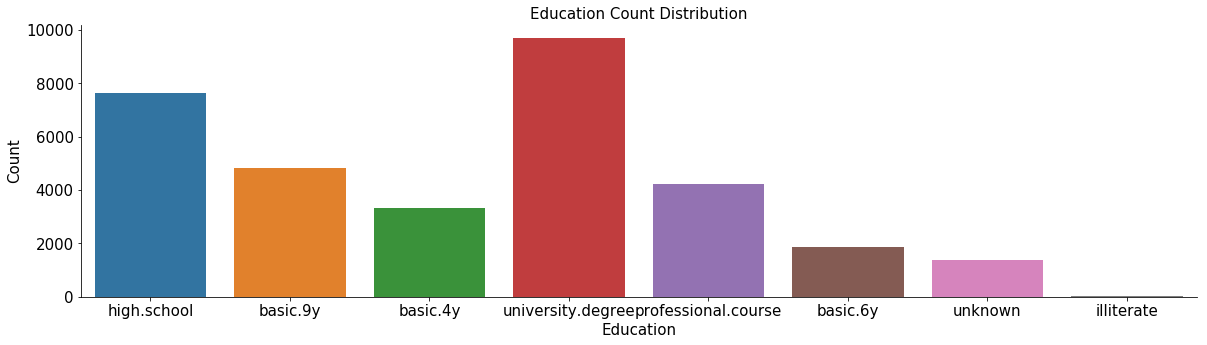

In [46]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

### DEFAULT, HOUSING, LOAN 

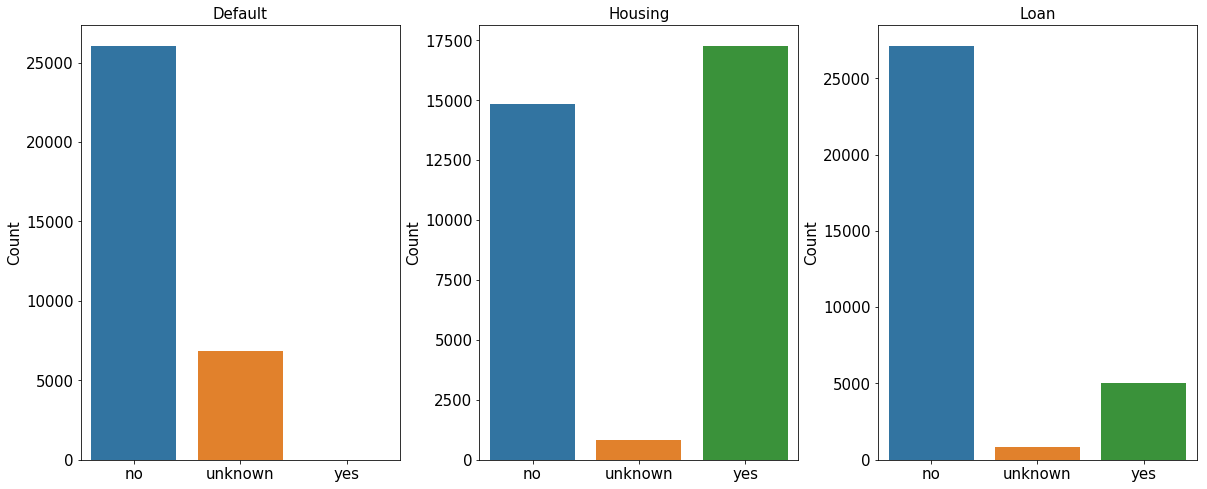

In [47]:
# Default, has credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing, has housing loan ?
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, has personal loan ?
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [48]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())


Default:
 No credit in default: 26068 
 Unknown credit in default: 6879 
 Yes to credit in default: 3


In [49]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 14860 
 Unknown housing in loan: 809 
 Yes to housing in loan: 17281


In [50]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 27139 
 Unknown to personal loan: 809 
 Yes to personal loan: 5002


BANK CLIENTS CONCLUSION
The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

### 1.7 Bank Client Categorical Treatment

* Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllyed later

In [51]:
#Label Encoder order is alphanumeric
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])

In [52]:
#function to creat group of ages, this helps because we have 78 differente values here

def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [53]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,1,4,0,3,0,0,2
1,1,1,1,2,1,2,2
2,1,1,0,2,0,2,2
3,2,1,1,0,0,0,0
4,2,1,1,0,0,0,0


Manualy way to convert Categorical in Continuous

bank_client['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

bank_client['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

bank_client['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

bank_client['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

A way to Converting Categorical variables using dummies if you judge necessary

bank_client = pd.get_dummies(data = bank_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['education'], prefix = ['education'], drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

bank_client = pd.get_dummies(data = bank_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [54]:
print(bank_client.shape)
bank_client.head()

(32950, 7)


,age,job,marital,education,default,housing,loan
0,1,4,0,3,0,0,2
1,1,1,1,2,1,2,2
2,1,1,0,2,0,2,2
3,2,1,1,0,0,0,0
4,2,1,1,0,0,0,0


## 2. Related with the last contact of the current campaign

* Treat categorical, see those values
* group continous varaible if necessary

In [55]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,wed,149
1,cellular,may,thu,11
2,telephone,jun,wed,121
3,telephone,jun,thu,163
4,telephone,may,mon,131


In [56]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [57]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich months is this campgaining work: \n", bank_related['month'].unique())
print("\nWhich days of the week these campaining work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which months is this campgaining work: 
 ['may' 'jun' 'aug' 'jul' 'nov' 'apr' 'dec' 'mar' 'oct' 'sep']

Which days of the week these campaining work: 
 ['wed' 'thu' 'mon' 'tue' 'fri']


### 2.1 Duration

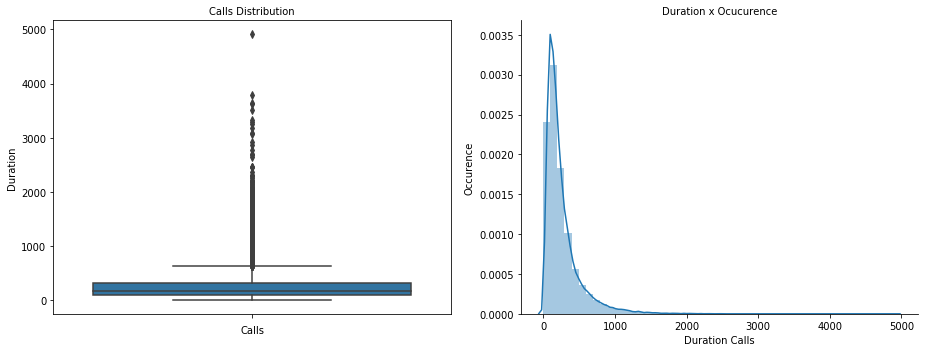

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


In [59]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [60]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  179.0
3º Quartile:  318.0
4º Quartile:  4918.0
Duration calls above:  642.0 are outliers


In [61]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2359
Number of clients:  32950
Outliers are: 7.16 %


In [62]:
# Look, if the call duration is iqual to 0, then is obviously that this person didn't subscribed, 
# THIS LINES NEED TO BE DELETED LATER 
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,no
1916,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
5775,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
15752,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


### 2.2 Contact, Month, Day of Week

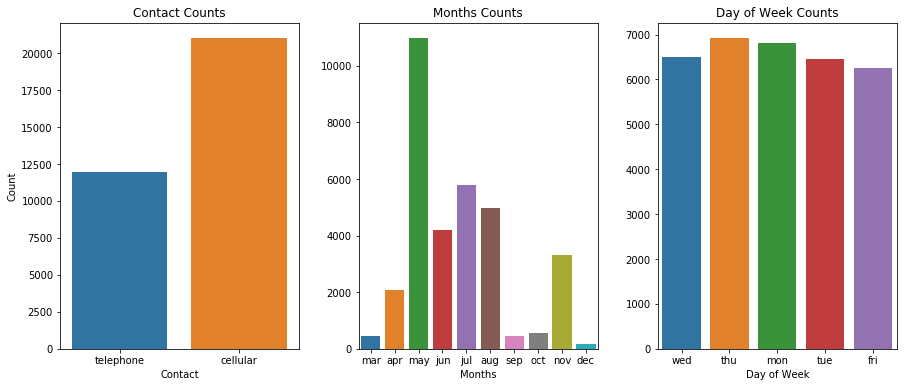

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [64]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  642.0 are outliers


In [65]:
bank_related[bank_related['duration'] > 640].count()

contact        2395
month          2395
day_of_week    2395
duration       2395
dtype: int64

#### Contact, Month, Day of Week treatment

In [66]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

A way to Converting Categorical variables using dummies if you judge necessary

bank_related = pd.get_dummies(data = bank_related, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

bank_related = pd.get_dummies(data = bank_related, prefix = ['month'] , columns = ['month'] , drop_first = True)

bank_related = pd.get_dummies(data = bank_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [67]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,4,149
1,0,6,2,11
2,1,4,4,121
3,1,4,2,163
4,1,6,1,131


In [68]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [69]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,4,2
1,0,6,2,1
2,1,4,4,2
3,1,4,2,2
4,1,6,1,2


### Social and economic context attributes

In [70]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.856,5191.0
1,-1.8,92.893,-46.2,1.266,5099.1
2,1.4,94.465,-41.8,4.864,5228.1
3,1.4,94.465,-41.8,4.866,5228.1
4,1.1,93.994,-36.4,4.857,5191.0


### Other attributes

In [71]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,5,999,0,nonexistent
2,2,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [72]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [73]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

### Model

In [74]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(32950, 20)

In [ ]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final,y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [85]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
28954,2,10,1,5,0,0,2,1,9,0,1,-3.4,92.379,-29.8,0.773,5017.5,1,999,0,1
29240,1,0,2,6,1,1,1,1,6,3,1,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
21776,2,1,1,0,0,2,0,1,6,0,5,1.1,93.994,-36.4,4.857,5191.0,2,999,0,1
9787,2,0,2,6,1,2,0,1,4,3,2,1.4,94.465,-41.8,4.864,5228.1,2,999,0,1
28161,2,9,1,6,0,0,0,0,0,1,2,-1.8,93.075,-47.1,1.405,5099.1,1,999,0,1


In [87]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5648    0]
 [ 752    0]]
88.0


k=1 80.41 (+/- 0.83)
k=2 88.05 (+/- 0.56)
k=3 86.51 (+/- 0.71)
k=4 88.58 (+/- 0.61)
k=5 88.15 (+/- 0.54)
k=6 88.78 (+/- 0.63)
k=7 88.64 (+/- 0.64)
k=8 88.85 (+/- 0.64)
k=9 88.80 (+/- 0.63)
k=10 88.87 (+/- 0.64)
k=11 88.87 (+/- 0.64)
k=12 88.88 (+/- 0.63)
k=13 88.88 (+/- 0.63)
k=14 88.88 (+/- 0.63)
k=15 88.88 (+/- 0.63)
k=16 88.88 (+/- 0.63)
k=17 88.88 (+/- 0.63)
k=18 88.88 (+/- 0.63)
k=19 88.88 (+/- 0.63)
k=20 88.88 (+/- 0.63)
k=21 88.88 (+/- 0.63)
k=22 88.88 (+/- 0.63)
k=23 88.88 (+/- 0.63)
k=24 88.88 (+/- 0.63)
k=25 88.88 (+/- 0.63)
The optimal number of neighbors is 11 with 88.9%


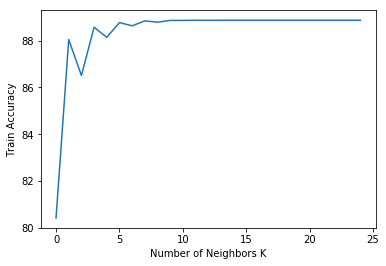

In [89]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()


In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5648    0]
 [ 752    0]]
88.0


In [91]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5165  483]
 [ 689   63]]
82.0


In [92]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[4774  874]
 [ 635  117]]
76.0


In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5623   25]
 [ 748    4]]
88.0


In [94]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5623   25]
 [ 749    3]]
88.0


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[5646    2]
 [ 752    0]]
88.0


In [101]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,K-Near Neighbors,0.889002
4,Logistic Model,0.889002
6,Gradient Boosting,0.888663
5,Gausian NB,0.885461
0,Random Forest Classifier,0.883202
2,Support Vector Machine,0.811902
1,Decision Tree Classifier,0.786177


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

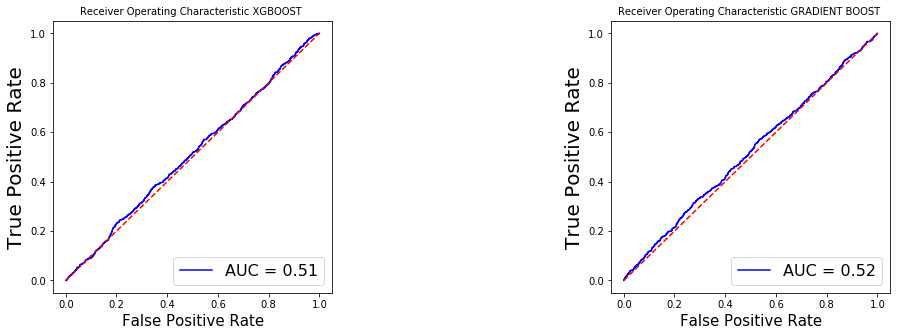

In [102]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


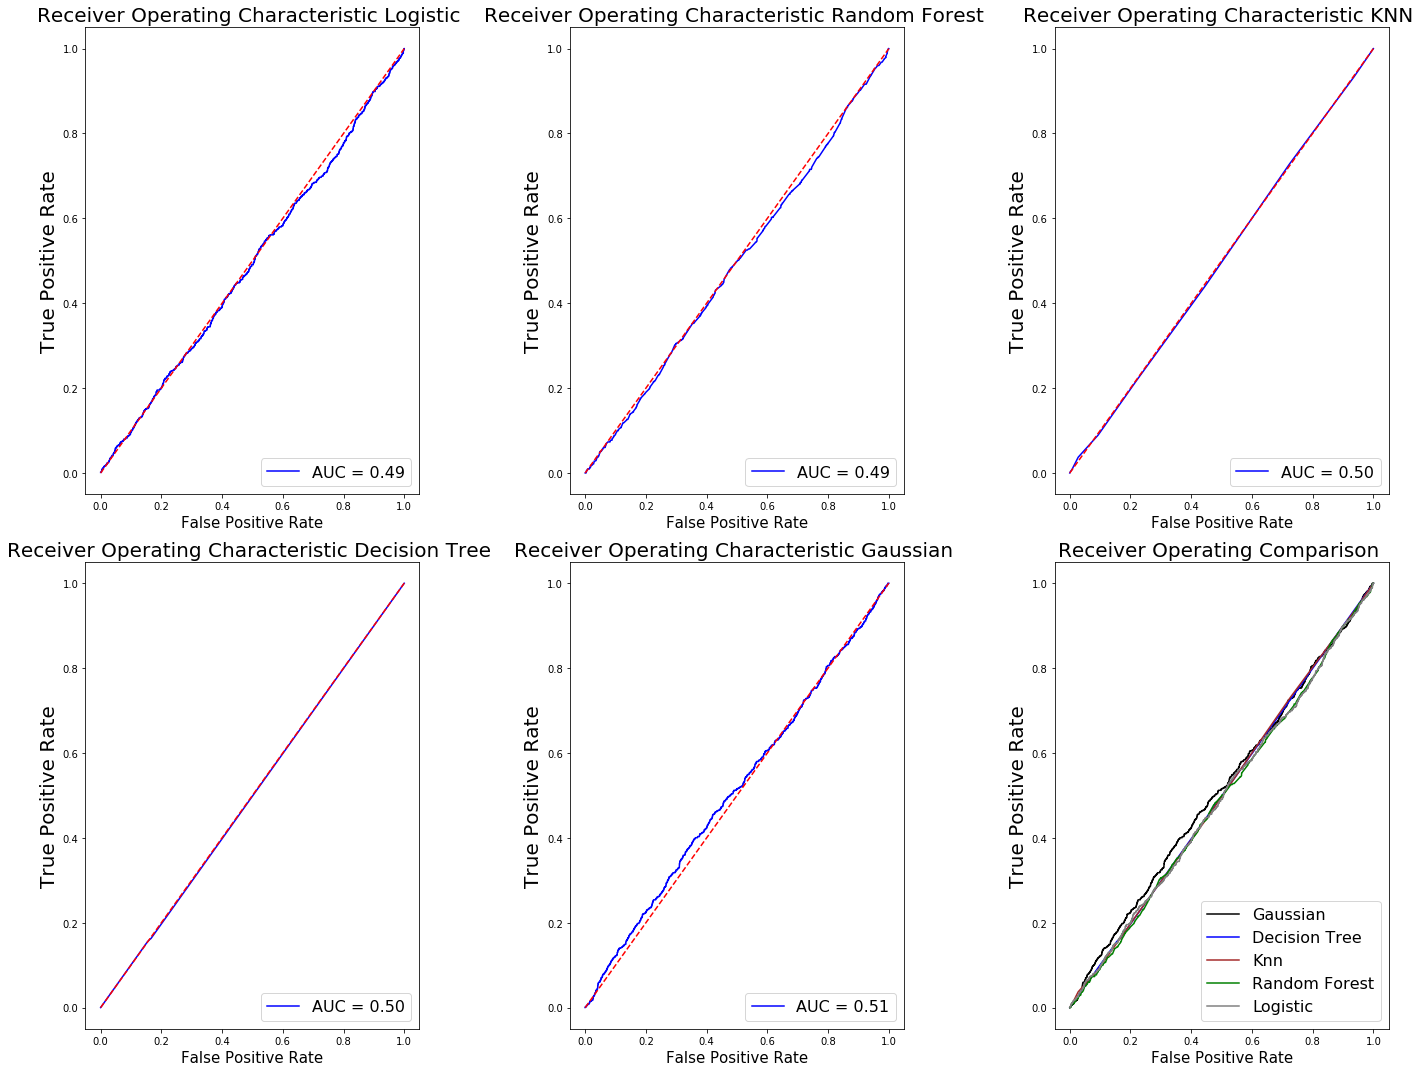

In [103]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

# ANALYZING THE RESULTS

In [104]:
from sklearn.metrics import classification_report

In [105]:
print('KNN Confusion Matrix\n', confusion_matrix(y_test, knnpred))

KNN Confusion Matrix
 [[5648    0]
 [ 752    0]]


In [106]:
print('KNN Reports\n',classification_report(y_test, knnpred))

KNN Reports
              precision    recall  f1-score   support

          0       0.88      1.00      0.94      5648
          1       0.00      0.00      0.00       752

avg / total       0.78      0.88      0.83      6400



### CHOOSED MODEL ANALYSIS

### RECALL

In [107]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i68.tinypic.com/iyj4fc.jpg")

In [108]:
print(round(7163 /(7163 + 116),2))

0.98


In [110]:
print(round(253 / (253 + 706  ),2))
print(round(metrics.recall_score(y_test, knnpred),2))

0.26
0.0


### PRECISION 

In [111]:
print(round(7163 / (7163 + 706),2))

0.91


In [113]:
print(round(253 / (253 + 116),2))
print(round(metrics.precision_score(y_test, knnpred),2))

0.69
0.0


In [114]:
F1_0 = 2*0.91*0.98/(0.91+0.98)
round(F1_0,2)

0.94

In [115]:
F1_1 = 2*0.69*0.26/(0.69+0.26)
round(F1_1,2)

0.38

### AVG/ TOTAL

* this consider the weights of sum of REAL VALUES [line 1] [line2]

In [116]:
AVG_precision =  (0.91*(7279/8238))+ (0.69*(959/8238))
round(AVG_precision,2)

0.88

In [117]:
AVG_Recall =  (0.98*(7279/8238))+ (0.26*(959/8238))
round(AVG_Recall,2)

0.9

In [118]:
AVG_f1 =  (0.95*(7279/8238))+ (0.38*(959/8238))
round(AVG_f1,2)

0.88

In [119]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i68.tinypic.com/iyj4fc.jpg")